<a href="https://colab.research.google.com/github/TheCiceerGuy/Image-Classification-on-ImageNet/blob/main/Image_Classification_using_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
from keras.applications.resnet50 import ResNet50
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input as preprocess_input_vgg, decode_predictions
from keras.applications.vgg16 import preprocess_input as preprocess_input_resnet, decode_predictions
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import matplotlib.pyplot as plt

**Load pre-trained VGG16 and ResNet50 models**

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False)
resnet_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


**Function to extract features using ResNet50 Model**

In [ ]:
def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_resnet(x)
    features = resnet_model.predict(x)
    return features.flatten()

**Function to extract features using VGG16**

In [ ]:
def extract_features_vgg(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_vgg(x)
    features = vgg_model.predict(x)
    return features.flatten()

**Load your image for training and testing**

In [ ]:
image_path = '/content/dog.png'
true_label = 0  # Actual label of the image (if available)

**Extract features using both VGG16 and ResNet50 for the given image**

In [ ]:
vgg_features = extract_features_vgg(image_path)
resnet_features = extract_features_resnet(image_path)

1/1 [==============================] - 2s 2s/step


**Combine features from both models**

In [ ]:
combined_features = np.concatenate((vgg_features, resnet_features))

**Reshape combined features to a format compatible with classifiers**

In [ ]:
reshaped_features = combined_features.reshape(1, -1)

**Initialize classifiers**

In [ ]:
label = 0
rf_classifier = RandomForestClassifier(n_estimators=100)
knn_classifier = KNeighborsClassifier(n_neighbors=1)
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()

In [ ]:
classifiers = {
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'Decision Tree': dt_classifier,
    'Naive Bayes': nb_classifier
}

**Train classifiers with the single image features**

In [ ]:
for name, clf in classifiers.items():
    clf.fit(reshaped_features, [true_label])
    pred = clf.predict(reshaped_features)
    accuracy = accuracy_score([true_label], pred)
    print(f"{name} Accuracy: {accuracy}")

Random Forest Accuracy: 1.0
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0
Naive Bayes Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


**Predict using ML classifiers with combined features**

**Train Random Forest classifier with the single image features**

In [ ]:
rf_classifier.fit(reshaped_features, [true_label])
rf_pred = rf_classifier.predict(reshaped_features)
rf_accuracy = accuracy_score([true_label], rf_pred)

In [ ]:
nb_classifier.fit(reshaped_features, [true_label])
nb_pred = nb_classifier.predict(reshaped_features)
nb_accuracy = accuracy_score([true_label], nb_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


**Print predictions**

In [ ]:
print(f"Random Forest Prediction: {rf_pred}")

print(f"Naive Bayes Prediction: {nb_pred}")

Random Forest Prediction: [0]
Naive Bayes Prediction: [0]


In [ ]:
print("True Label:", true_label)
print("Random Forest Predicted Label:", rf_pred[0])
print("Naive Bayes Predicted Label:", nb_pred[0])

True Label: 0
Random Forest Predicted Label: 0
Naive Bayes Predicted Label: 0


**Accuracy Comparison Visualization**

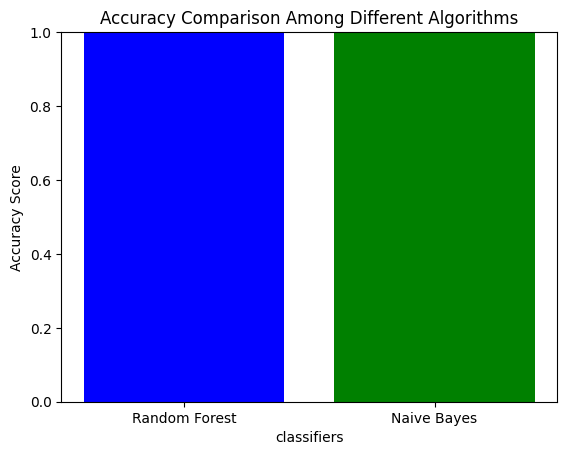

In [ ]:


# Accuracy scores for each algorithm
algorithms = ['Random Forest','Naive Bayes']
accuracy_scores = [rf_accuracy, nb_accuracy]

# Plotting the accuracy comparison
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison Among Different Algorithms')
plt.ylim(0, 1)  #y-axis limit between 0 and 1 for accuracy scores
plt.show()


Each prediction corresponds to the label/class assigned by the respective classifier for the provided image. The result [0] indicates that all classifiers predicted the same label for the image.

**What you have learned from this project and about the algorithms?**
1.   Feature Extraction using Pre-trained Models: Leveraging pre-trained deep learning models like VGG16 allows for effective feature extraction from images. These models, trained on large datasets like ImageNet, offer valuable features that can be utilized for other machine learning tasks.
2.   Image Classification: The use of machine learning algorithms like Random Forest and Naive Bayes on extracted features enables image classification tasks even with limited data. These algorithms can work well with reduced, high-level representations obtained from deep learning models.
3.Model Performance and Interpretation: Assessing the performance of various algorithms on image data involves not just accuracy measurement but also understanding the interpretability of predictions. Some algorithms might perform better on specific types of data due to their inherent characteristics.
4.Handling Image Data: Image data preprocessing, including resizing, normalization, and formatting, is crucial for compatibility with deep learning models and downstream machine learning algorithms.
5.Algorithm Selection: Different algorithms have their strengths and weaknesses. Deep learning models excel at feature extraction from complex data like images, while traditional machine learning models like Random Forest and Naive Bayes can effectively work with extracted features for classification tasks.
6.Transfer Learning and Reusability: Pre-trained models offer the advantage of transfer learning, allowing the use of learned features for other tasks, thus saving computational resources and time.

